# Web scrapper 

In [11]:
pip install -qq google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -qq -U watermark

Note: you may need to restart the kernel to use updated packages.


In [13]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

CPython 3.7.4
IPython 7.8.0

pandas 0.25.1
matplotlib 3.1.1
seaborn 0.9.0
google_play_scraper 0.0.2.5


In [14]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [15]:
app_packages = [
    'com.dd.doordash',
    'com.grubhub.android',
    'com.ubercab.eats',
    'com.instacart.client',
    'com.starbucks.mobilecard',
    'com.subway.mobile.subwayapp03',
    'com.mcdonalds.app',
    'com.emn8.mobilem8.nativeapp.bk',
    'com.dominospizza',
    'com.dunkinbrands.otgo',
    'com.papajohns.android',
    'com.tacobell.ordering'
    
]

In [16]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 12/12 [00:04<00:00,  2.83it/s]


In [17]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [18]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.1",
  "androidVersionText": "5.1 and up",
  "appId": "com.dd.doordash",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Delivery anywhere you are. DoorDash offers the greatest selection of your favorite local and national restaurants -- more than 310,000 menus across 4,000+ cities in the U.S.,Canada and Australia. Spend more time doing the things you love -- we'll take care of the rest.\r\n\r\nYOUR FAVORITE RESTAURANTS JUST A FEW TAPS AWAY\r\nChoose from a huge variety of cuisines, from your local sushi spot to the comfort food you crave. Get your favorite meals faster with quick and easy ordering.\r\n\r\nSUBSCRIBE TO DASHPASS\r\nDashPass offers lower service fees and $0 delivery fees, with thousands of local restaurants recently added.\r\n\r\nNO-CONTACT DELIVERY \r\nDeliveries are now left at your door by default and you have the choice to select \u201cHand 

  "title": "DoorDash - Food Delivery",
  "updated": 1589420455,
  "url": "https://play.google.com/store/apps/details?id=com.dd.doordash&hl=en&gl=us",
  "version": "12.5.3",
  "video": "https://www.youtube.com/embed/i83Pb7B_s94?ps=play&vq=large&rel=0&autohide=1&showinfo=0",
  "videoImage": "https://i.ytimg.com/vi/i83Pb7B_s94/hqdefault.jpg"
}



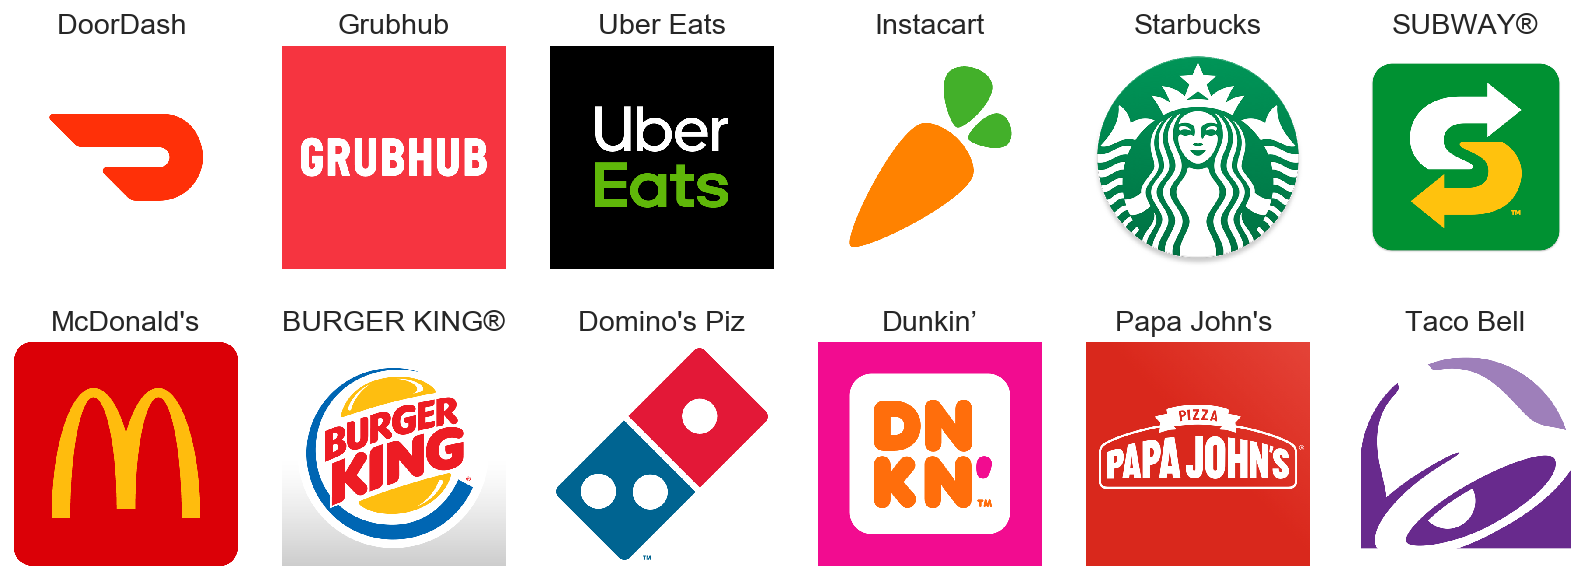

In [19]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:12]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [20]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [21]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 12/12 [01:24<00:00,  7.07s/it]


In [22]:
print_json(app_reviews[0])

{
  "appId": "com.dd.doordash",
  "at": "2020-05-12 23:41:35",
  "content": "Loved the app and service at first despite the inflated prices, but for the past three months there have been multiple delivery issues. Between missing items, the whole order being delivered to neighbors' houses, having to go road by road explanation on how to get to our house (which is easily findable via Google Maps), and \"customer service\" never reimbursing or refunding full amount of the items missing, I do not recommend using this delivery service and will be looking into different options.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "12.6.3",
  "reviewId": "gp:AOqpTOF35q4r3ONpFjdnmnPUTw7geO7-hYgDHnQS344ri2y_yUkzQytFqAblhDWF1C0VTdecSjOHfwjv3MODmA",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 21,
  "userImage": "https://lh3.googleusercontent.com/a-/AOh14GjXCeCwfV0TkeKqjU5gOIQdzUNaEXGm1a_enkL4",
  "userName": "Kelly Powers"
}



In [23]:
len(app_reviews)

14400

In [24]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [25]:
df = pd.read_csv('reviews.csv', lineterminator='\n')
df.shape
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId\r
14395,gp:AOqpTOHB8Zba5jBGQ3TTlAjMX4tWoCwkNH0UqQdCrLb...,Los Lozanos,https://lh3.googleusercontent.com/a-/AOh14Gir5...,I love your chalupas,5,0,5.27.0,2020-05-07 02:42:08,NaN,NaN,newest,com.tacobell.ordering\r
14396,gp:AOqpTOFejpTvcRLwIBDcq9bWsYcLx_5jt7SP4_GUWn-...,Paula D Flagg-Searcy,https://lh3.googleusercontent.com/a-/AOh14GhJ9...,Easy! Fast! Feeling empowered in the drive-thru!,5,0,5.27.0,2020-05-07 02:20:43,NaN,NaN,newest,com.tacobell.ordering\r
14397,gp:AOqpTOFttrlK-EIEjkgvo6bjWDDz6jghFaUE2urYP4l...,Tracy Callahan,https://lh3.googleusercontent.com/-WWkj95ezLYs...,Great,5,0,5.27.0,2020-05-07 01:25:55,NaN,NaN,newest,com.tacobell.ordering\r
14398,gp:AOqpTOHLsZApvzkRuBf0PoqaISoAyEvBrG-mlxIA0XR...,Dana Roysdon,https://lh3.googleusercontent.com/-eT18-A_-U1M...,It does what is supposed to do.,5,0,5.27.0,2020-05-07 00:04:08,NaN,NaN,newest,com.tacobell.ordering\r
14399,gp:AOqpTOFZp--H8KI6SHoawHnqHNOjz-z9hWIH1hEFN-V...,Taylor Rae Cichocki,https://lh3.googleusercontent.com/a-/AOh14GhaL...,Easy to use. Laid out well.,5,0,5.27.0,2020-05-06 23:48:23,NaN,NaN,newest,com.tacobell.ordering\r
